In [29]:
from math import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.style.use('fivethirtyeight')
plt.rcParams['axes.facecolor'] = '#e8e8e8'
plt.rcParams['axes.edgecolor'] = '#e8e8e8'
plt.rcParams['figure.facecolor'] = '#e8e8e8'

u0 = 1.2566370614 # in units of mT*mm/A

In [30]:
def F_ex(a, b, R, tau, rho):
  term1 = (18*a**4 + 13*b**4)/(1250*R**4)
  term2 = 31*a**2*b**2/(750*R**4)
  term3 = (tau + rho)/R * (1/5 + 2*(a**2-b**2)/(250*R**2))
  term4 = (tau**2+rho**2)/(250*R**2) * (25 + (52*b**2-62*a**2)/(R**2))
  term5 = 8*(tau**3+rho**3)/(25*R**3)
  term6 = 52*(tau**4+rho**4)/(125*R**4)
  
  return -term1 + term2 + term3 - term4 - term5 - term6


def F_1x(a, b, R, tau, rho):
  term1 = (tau-rho)/R * (150 + (24*b**2-44*a**2)/(R**2))
  term2 = 165*(tau**2-rho**2)/(R**2)
  term3 = 96*(tau**3-rho**3)/(R**3)
  
  return term1 + term2 + term3


def F_2x(a, b, R, tau, rho):
  term1 = (31*b**2-36*a**2)/(R**2)
  term2 = 60*(tau+rho)/R
  term3 = 186*(tau**2+rho**2)/(R**2)
  
  return term1 + term2 + term3


def F_3x(R, tau, rho):
  
  return 88*(tau-rho)/R


def F_1y(a, b, R, tau, rho):
  term1 = (rho-tau)/R * (75 + (12*b**2-22*a**2)/(R**2))
  term2 = 165*(rho**2-tau**2)/(2*R**2)
  term3 = 48*(rho**3-tau**3)/(R**3)
  
  return term1 + term2 + term3


def F_2y(a, b, R, tau, rho):
  term1 = 2*(36*a**2-31*b**2)/(R**2)
  term2 = 120*(tau-rho)/R
  term3 = 372*(tau**2+rho**2)/(R**2)
  
  return term1 - term2 - term3


def F_3y(R, tau, rho):
  
  return 66*(tau-rho)/R

def Bx(x, y, N, I, a, b, R, tau, rho):
  prefactor_0 = 8*u0*N*I/(5*sqrt(5)*R)
  term2 = b**2/(60*R**2)
  prefactor_5 = (2*x**2-y**2)/(125*R**2)
  prefactor_6 = (3*x*y**2-2*x**3)/(125*R**3)
  term7 = 18/(125*R**4)*(8*x**4-24*x**2*y**2)
                         
  return prefactor_0 * (1 - term2 + F_ex(a, b, R, tau, rho)
    + x/(125*R)*F_1x(a, b, R, tau, rho)
    + prefactor_5*F_2x(a, b, R, tau, rho)
    + prefactor_6*F_3x(R, tau, rho) - term7)


def By(x, y, N, I, a, b, R, tau, rho):
  prefactor_0 = 8*u0*N*I/(5*sqrt(5)*R)
  prefactor_3 = y*(4*x**2-y**2)/(125*R**3)
  term4 = x*y/(125*R**4)*(288*x**2-216*y**2)
  
  return prefactor_0 * (y/(125*R)*F_1y(a, b, R, tau, rho)
    + x*y/(125*R**2)*F_2y(a, b, R, tau, rho)
    + prefactor_3*F_3y(R, tau, rho) + term4)

In [31]:
# Parámetros de las bobinas
N = 100  # Número de vueltas
I = 1  # Corriente
a = 5  # Radio
b = 10  # Altura
R = 15  # Distancia al centro

# Posición de las bobinas
theta1 = 0*pi/2
theta2 = pi/2
theta3 = pi
theta4 = 3*pi/2

# Cálculo del campo en el centro
Bx_centro = 0
By_centro = 0

for i in range(4):
  Bx_centro += Bx(0, 0, N, I, a, b, R, theta1 + i*pi/2, 0)
  By_centro += By(0, 0, N, I, a, b, R, theta1 + i*pi/2, 0)

# Impresión del resultado
print("Bx en el centro:", Bx_centro)
print("By en el centro:", By_centro)


Bx en el centro: 24.278645817563124
By en el centro: 0.0


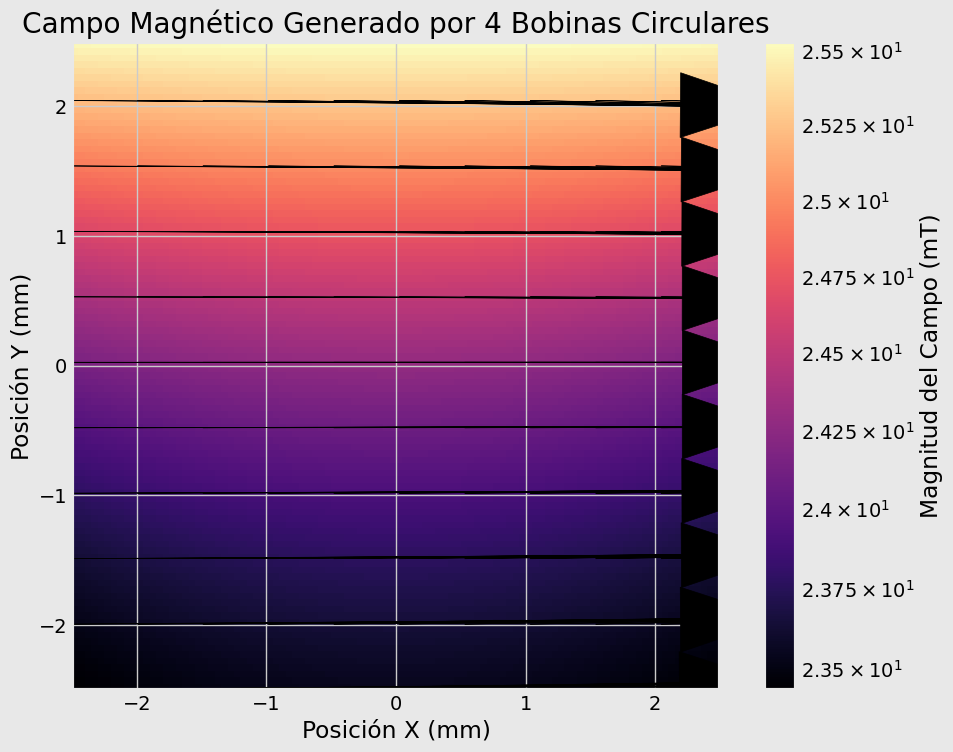

In [32]:
# Cálculo del campo en una malla
pts_per_axis = 100
img_span = R/6

x = np.linspace(-img_span, img_span, pts_per_axis, endpoint=True, dtype=np.float64)
y = np.linspace(-img_span, img_span, pts_per_axis, endpoint=True, dtype=np.float64)

Bx_map = np.empty(shape=[x.size, y.size], dtype=np.float64)
By_map = np.empty(shape=[x.size, y.size], dtype=np.float64)

for ix, xval in enumerate(x):
  for iy, yval in enumerate(y):
    Bx_map[ix,iy] = 0
    By_map[ix,iy] = 0
    for i in range(4):
      Bx_map[ix,iy] += Bx(xval, yval, N, I, a, b, R, theta1 + i*pi/2, 0)
      By_map[ix,iy] += By(xval, yval, N, I, a, b, R, theta1 + i*pi/2, 0)

# Cálculo de la magnitud del campo y el vector dirección
B_magnitude_map = np.sqrt(np.square(Bx_map) + np.square(By_map))
B_vector_map = np.arctan2(By_map, Bx_map)*180/np.pi

# Visualización del campo
fig = plt.figure(figsize=(10,8))
plt.title('Campo Magnético Generado por 4 Bobinas Circulares')
plt.xlabel('Posición X (mm)')
plt.ylabel('Posición Y (mm)')

axes_range = [x.min(), x.max(), y.min(), y.max()]

# Opciones para plt.imshow
imshow_options = {
  'cmap': 'magma',
  'extent': axes_range,
  'norm': LogNorm(),
  'origin': 'lower'
}

plt.imshow(B_magnitude_map, **imshow_options)
plt.colorbar(label='Magnitud del Campo (mT)')

# Dibujar las bobinas
for i in range(4):
  theta = theta1 + i*pi/2
  x_coil = R*cos(theta)
  y_coil = R*sin(theta)
  
  coil_circle = plt.Circle((x_coil, y_coil), a, fill=False, color='black')
  plt.gca().add_patch(coil_circle)
  
# Dibujar flechas del campo
spacing = 10
for ix in range(0, x.size, spacing):
  for iy in range(0, y.size, spacing):
    B_x = Bx_map[ix,iy]
    B_y = By_map[ix,iy]
    
    plt.arrow(x[ix], y[iy], B_x*0.2, B_y*0.2, head_width=0.5, color='black')

plt.axis(axes_range)
plt.show()

